## COVID-19 HK

##### Data source: https://data.gov.hk/en-data/dataset/hk-dh-chpsebcddr-novel-infectious-agent

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [2]:
data=pd.read_csv("../enhanced_sur_pneumonia_wuhan_eng.csv")

In [3]:
data.head()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
0,1,23/01/2020,21/01/2020,M,39,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed
1,2,23/01/2020,18/01/2020,M,56,Princess Margaret Hospital,Discharged,HK resident,Imported,Confirmed
2,3,24/01/2020,20/01/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed
3,4,24/01/2020,23/01/2020,F,62,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed
4,5,24/01/2020,23/01/2020,M,63,Princess Margaret Hospital,Discharged,Non-HK resident,Imported,Confirmed


In [4]:
data.tail()

,Case no.,Report date,Date of onset,Gender,Age,Name of hospital admitted,Hospitalised/Discharged/Deceased,HK/Non-HK resident,Case classification*,Confirmed/probable
133,134,13/03/2020,10//03/2020,M,67,Prince of Wales Hospital,Hospitalised,HK resident,Possibly local,Confirmed
134,135,13/03/2020,08/03/2020,F,30,Queen Mary Hospital,Hospitalised,HK resident,Possibly local,Confirmed
135,136,13/03/2020,07/03/2020,M,61,Pamela Youde Nethersole Eastern Hospital,Hospitalised,HK resident,Possibly local,Confirmed
136,137,13/03/2020,06/03/2020,F,54,Pamela Youde Nethersole Eastern Hospital,Hospitalised,HK resident,Imported,Confirmed
137,138,13/03/2020,Asymptomatic,M,66,Princess Margaret Hospital,Hospitalised,HK resident,Close contact of possibly local,Confirmed


## Confirmed cases in HK

In [5]:
resident=data[data['HK/Non-HK resident']=='HK resident']

In [6]:
data.shape

(138, 10)

In [7]:
non_redsident=data[data['HK/Non-HK resident']=='Non-HK resident']

In [8]:
data.shape

(138, 10)

On 13 Mar 2020, 131 HK residents and 10 Non-HK residents have confirmed cases of COVID-19 in HK.

### Age Distribution of Confirmed Cases in HK

[(0, 123.462815892375)]

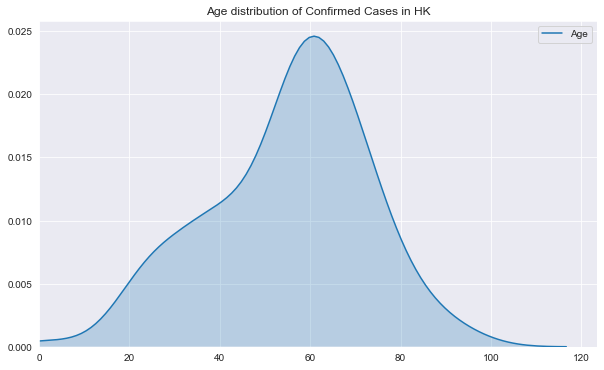

In [9]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmed Cases in HK")
sns.kdeplot(data=data['Age'], shade=True).set(xlim=(0))

### Gender Distribution of Confirmed Cases in HK

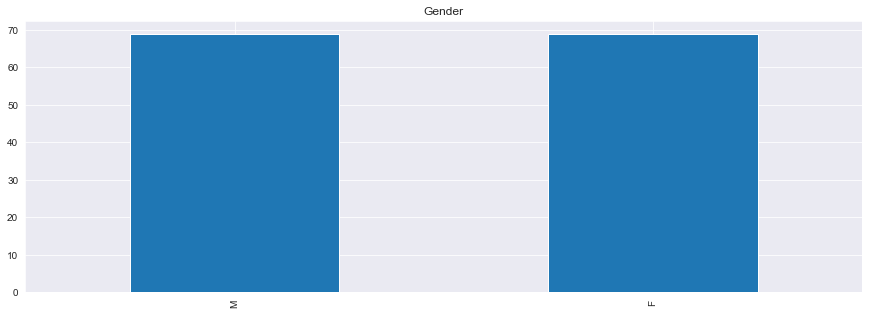

In [10]:
plt.figure(figsize=(15, 5))
plt.title('Gender')
data['Gender'].value_counts().plot.bar();

### Age Distribution of Confirmated Cases by Gender

In [11]:
male= data[data.Gender=='M']
female = data[data.Gender=='F']

[(0, 115.25689465743906)]

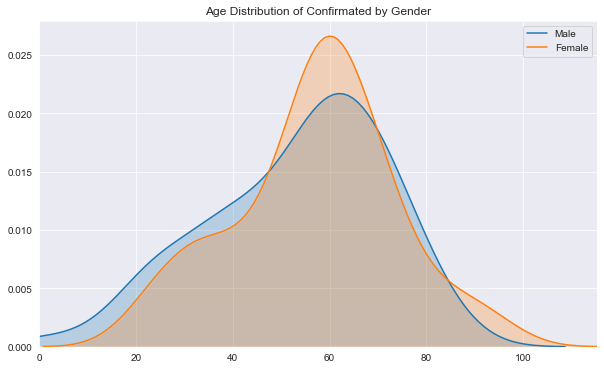

In [12]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age Distribution of Confirmated by Gender")
sns.kdeplot(data=male['Age'],label="Male" ,shade=True).set(xlim=(0))
sns.kdeplot(data=female['Age'], label="Female", shade=True).set(xlim=(0))

### Class Classification of Confirmed Cases

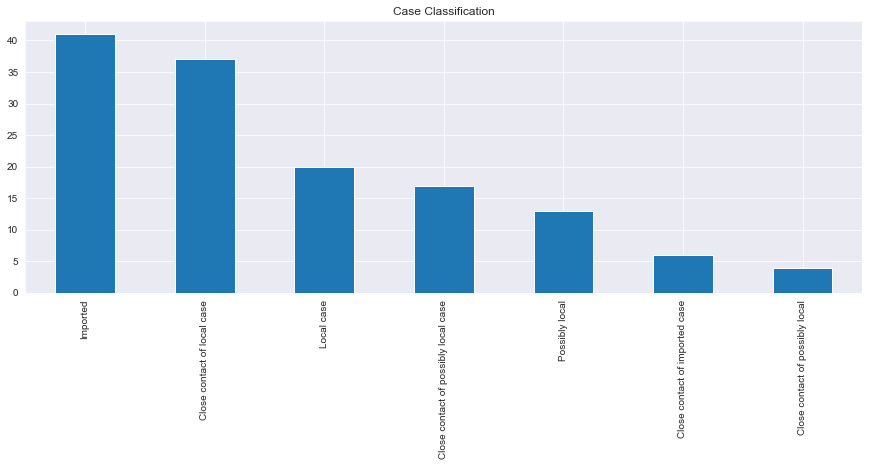

In [13]:
plt.figure(figsize=(15, 5))
plt.title('Case Classification')
data['Case classification*'].value_counts().plot.bar();

### Cases of Hospitalised/Discharged/Deceased

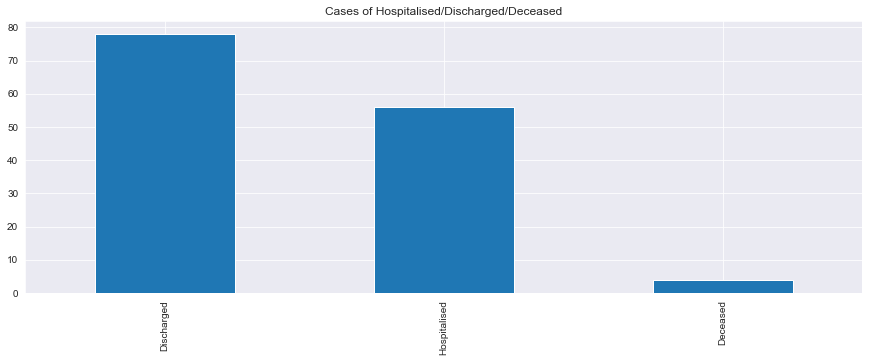

In [14]:
plt.figure(figsize=(15, 5))
plt.title('Cases of Hospitalised/Discharged/Deceased')
data['Hospitalised/Discharged/Deceased'].value_counts().plot.bar();

### Name of Hospital Admitted

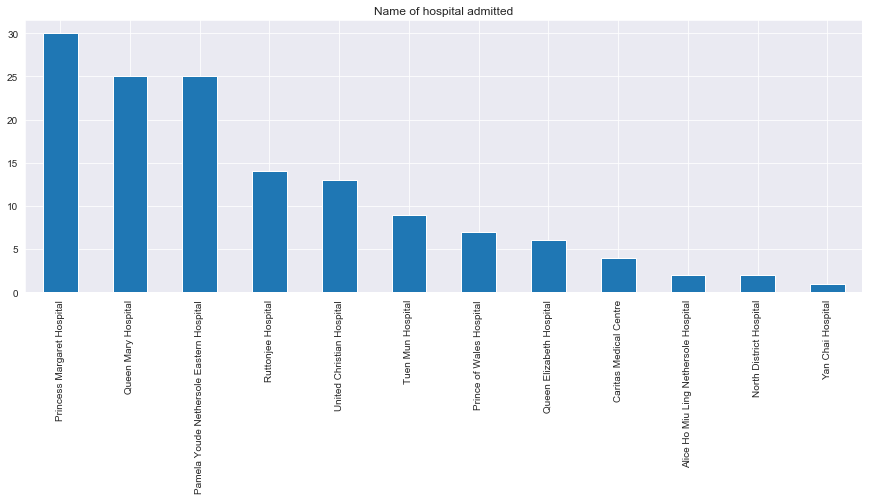

In [15]:
plt.figure(figsize=(15, 5))
plt.title('Name of hospital admitted')
data['Name of hospital admitted'].value_counts().plot.bar();